In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def power_string_to_num(df, val_col_name):
    # converting 'KWH/hh (per half hour)' into numerical type
    pd.to_numeric(df[val_col_name], errors='ignore')
    df[val_col_name] = pd.to_numeric(df[val_col_name], errors='coerce')

In [3]:
def chose_household(df, dates_col_name, val_col_name, hld_id_col_name, hld_id):
    # INPUT: DataFrame, dates_col_name, val_col_name, hld_id_col_name, hld_id as strings
    # OUTPUT: DataFrame where index is datetime shtamp
    # and single column with values chosen from original df
    df_household = df[df[hld_id_col_name]==hld_id]
    power_string_to_num(df_household, val_col_name)
    df_household[dates_col_name] = pd.Series(pd.to_datetime(df_household[dates_col_name]), index=df_household.index)
    df_household = pd.DataFrame(df_household[val_col_name].values,\
                                columns=[val_col_name], index=df_household[dates_col_name].values)
    df_household.name = hld_id
    return df_household

In [4]:
def plot_timeseries(df):
    # INPUT: DataFrame
    #date = pd.to_datetime(date).date()
    x = df.index
    y = df[df.columns[0]].values
    #
    plt.figure(figsize=(18,5))
    plt.plot(x, y)
    plt.xlabel('time')
    plt.ylabel(df.columns[0])
    plt.title('Data for the following household: {}'.format(df.name))

In [5]:
df_v2_1 = pd.read_csv('''../data/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_1.csv''')

In [6]:
print 'All households in this subset of data:', df_v2_1['LCLid'].unique()

All households in this subset of data: ['MAC000002' 'MAC000003' 'MAC000004' 'MAC000006' 'MAC000007' 'MAC000008'
 'MAC000009' 'MAC000010' 'MAC000011' 'MAC000012' 'MAC000013' 'MAC000016'
 'MAC000018' 'MAC000019' 'MAC000020' 'MAC000021' 'MAC000022' 'MAC000023'
 'MAC000024' 'MAC000025' 'MAC000026' 'MAC000027' 'MAC000028' 'MAC000029'
 'MAC000030' 'MAC000032' 'MAC000033' 'MAC000034' 'MAC000035' 'MAC000036']


In [7]:
df_v2_1.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent


In [8]:
df_02 = chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000002')

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
df_34 = chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000034')

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


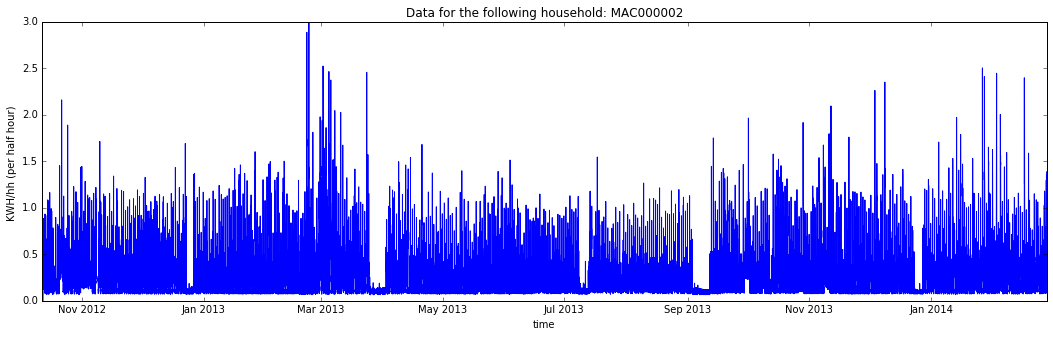

In [10]:
plot_timeseries(df_02)

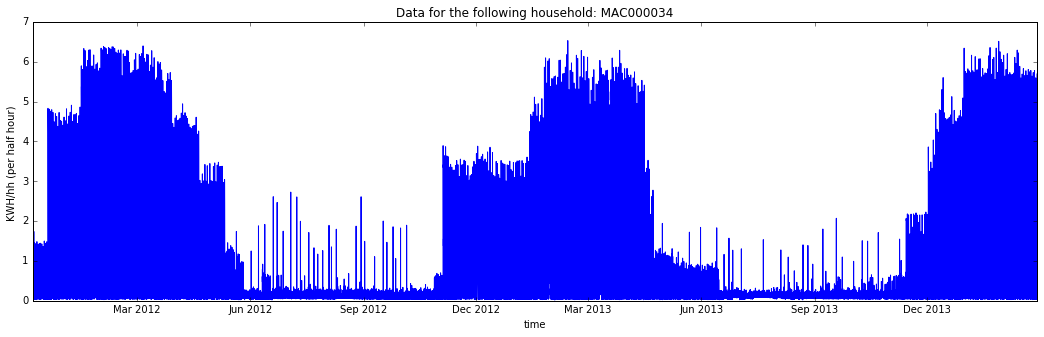

In [11]:
plot_timeseries(df_34)

In [12]:
df_35 = chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000035')

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


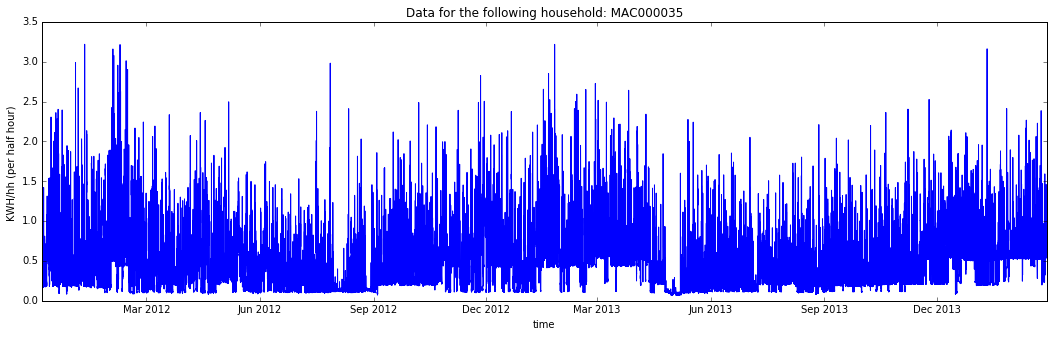

In [13]:
plot_timeseries(df_35)

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


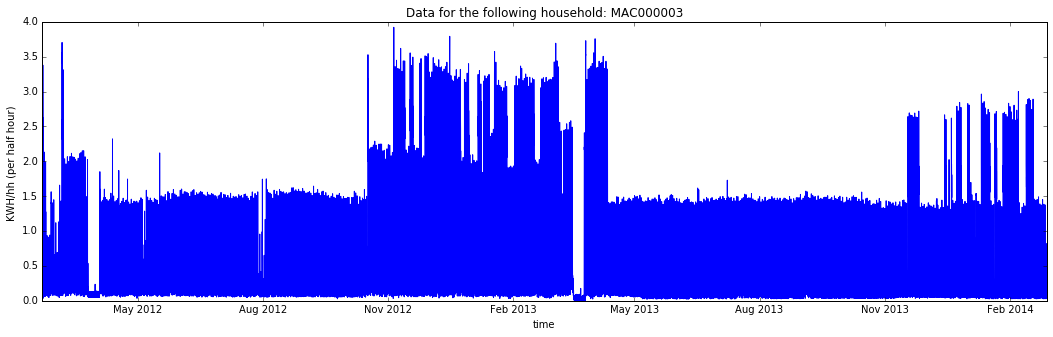

In [14]:
plot_timeseries(chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000003'))

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


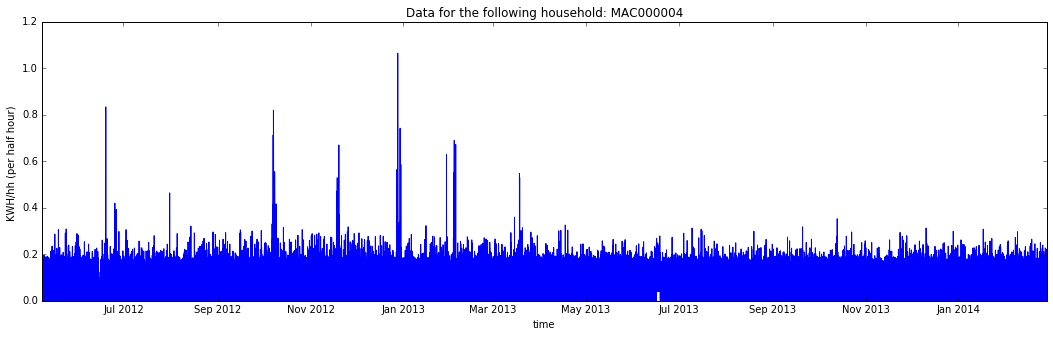

In [15]:
plot_timeseries(chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000004'))

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


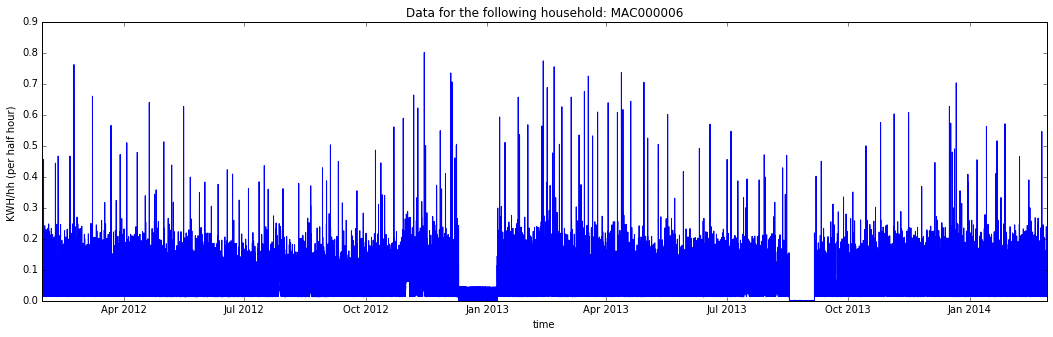

In [17]:
plot_timeseries(chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000006'))

In [20]:
df_35.head()

,KWH/hh (per half hour)
2011-12-07 13:00:00,0.438
2011-12-07 13:30:00,1.646
2011-12-07 14:00:00,1.494
2011-12-07 14:30:00,1.154
2011-12-07 15:00:00,0.585


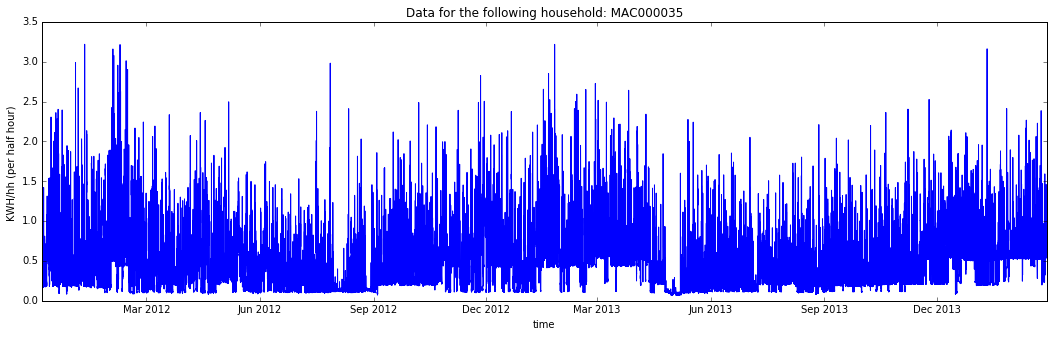

In [27]:
plot_timeseries(df_35)

In [23]:
df_35_daily = df_35.resample('D').sum()
df_35_daily.name = df_35.name+' daily'

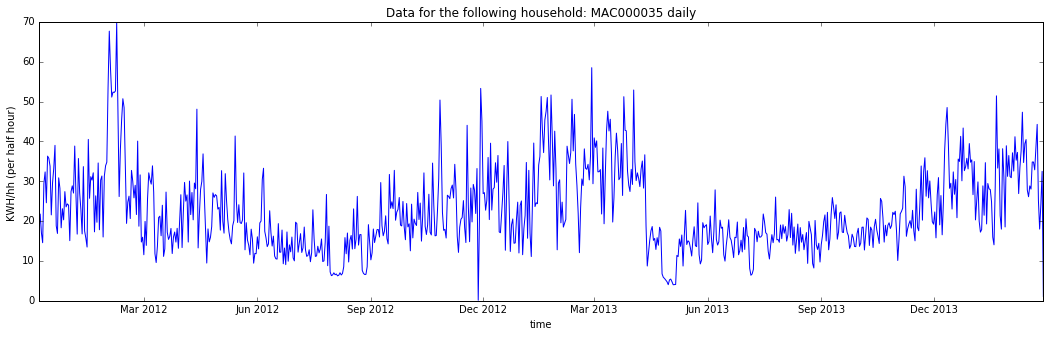

In [24]:
plot_timeseries(df_35_daily)

In [25]:
df_35_monthly = df_35.resample('M').sum()
df_35_monthly.name = df_35.name+' monthly'

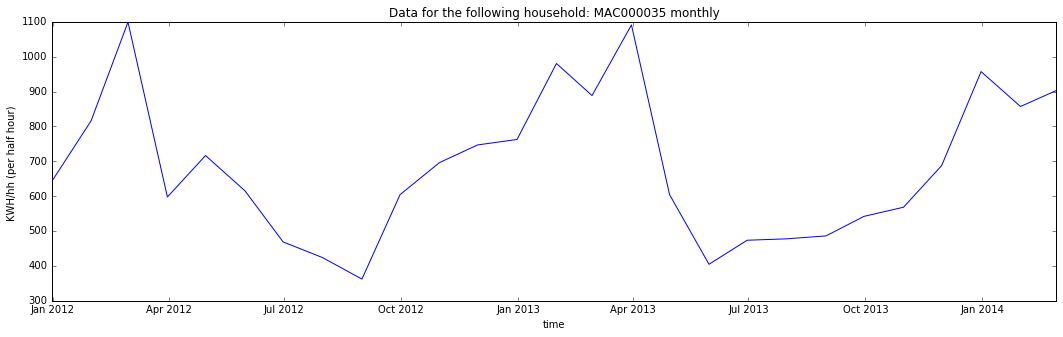

In [26]:
plot_timeseries(df_35_monthly)

In [44]:
def plot_timeseries_from_to(df, date_from, date_to):
    # INPUT: DataFrame and strings: date_from, date_to
    # dates should be in the format: 'yyyy-mm-dd' for example '2011-12-07'
    name = df.name
    date_from = pd.to_datetime(date_from).date()
    date_to = pd.to_datetime(date_to).date()
    df = df.query('index >= @date_from and index <= @date_to')
    x = df.index
    y = df[df.columns[0]].values
    #
    plt.figure(figsize=(18,5))
    plt.plot(x, y)
    plt.xlabel('time')
    plt.ylabel(df.columns[0])
    plt.title('Data for the following household: {}'.format(name))

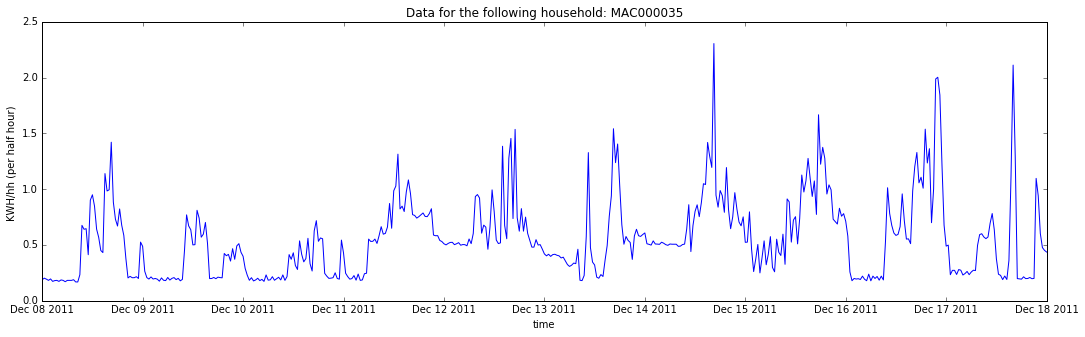

In [59]:
plot_timeseries_from_to(df_35, '2011-12-08', '2011-12-18')

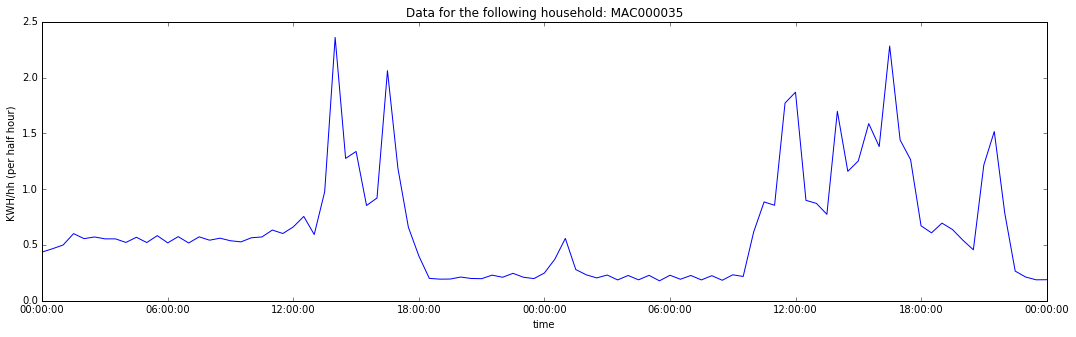

In [61]:
plot_timeseries_from_to(df_35, '2011-12-18', '2011-12-20')